#                             *Analysis*

- 3.1. Objectives
- 3.2. What Is Algorithm Analysis?
- 3.3. Big-O Notation
- 3.4. An Anagram Detection Example
- 3.4.1. Solution 1: Checking Off
- 3.4.2. Solution 2: Sort and Compare
- 3.4.3. Solution 3: Brute Force
- 3.4.4. Solution 4: Count and Compare
- 3.5. Performance of Python Data Structures
- 3.6. Lists
- 3.7. Dictionaries
- 3.8. Summary
- 3.9. Key Terms
- 3.10. Discussion Questions
- 3.11. Programming Exercises

---
### 3.1. Objectives
- To understand why algorithm analysis is important.
- To be able to use “Big-O” to describe execution time.
- To understand the “Big-O” execution time of common operations on Python lists and dictionaries.
- To understand how the implementation of Python data impacts algorithm analysis.
- To understand how to benchmark simple Python programs.

---
# 3.2. What Is Algorithm Analysis?

Algorithm analysis is concerned with comparing algorithms based upon the amount of computing resources that each algorithm uses.

At this point, it is important to think more about what we really mean by computing resources. There are two different ways to look at this. One way is to consider the amount of space or memory an algorithm requires to solve the problem. The amount of space required by a problem solution is typically dictated by the problem instance itself. Every so often, however, there are algorithms that have very specific space requirements, and in those cases we will be very careful to explain the variations.

As an alternative to space requirements, we can analyze and compare algorithms based on the amount of time they require to execute. This measure is sometimes referred to as the “execution time” or “running time” of the algorithm.

In [26]:
import time


def sum_of_n(n):
    start = time.time()
    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i
    end = time.time()
    return the_sum, end - start

print(sum_of_n(10))

(55, 2.384185791015625e-06)


In [37]:
for i in range(5):
     print("Sum is %d required %10.7f seconds" % sum_of_n(1000000))

Sum is 500000500000 required  0.0350914 seconds
Sum is 500000500000 required  0.0488017 seconds
Sum is 500000500000 required  0.0468316 seconds
Sum is 500000500000 required  0.0312500 seconds
Sum is 500000500000 required  0.0469174 seconds


In [51]:
def sum_of_n_3(n):
    start = time.time()
    result = (n * (n + 1)) / 2
    end = time.time()
    return result, end -start 


print(sum_of_n_3(10))

(55.0, 0.0)


In [40]:
for i in [10000,100000,1000000,10000000,100000000]:
     print("Sum is %d required %10.7f seconds" % sum_of_n(i))

Sum is 50005000 required  0.0010002 seconds
Sum is 5000050000 required  0.0060008 seconds
Sum is 500000500000 required  0.0548244 seconds
Sum is 50000005000000 required  0.6889658 seconds
Sum is 5000000050000000 required  6.8096163 seconds


In [60]:
for i in [10000,100000,1000000,10000000,100000000]:
     print("Sum is %d required %10.7f seconds" % sum_of_n_3(i))

Sum is 50005000 required  0.0000000 seconds
Sum is 5000050000 required  0.0000000 seconds
Sum is 500000500000 required  0.0000000 seconds
Sum is 50000005000000 required  0.0000000 seconds
Sum is 5000000050000000 required  0.0000000 seconds


There are two important things to notice about this output. First, the times recorded above are shorter than any of the previous examples. Second, they are very consistent no matter what the value of n. It appears that sum_of_n_3 is hardly impacted by the number of integers being added.

We need a better way to characterize these algorithms with respect to execution time. The benchmark technique computes the actual time to execute. It does not really provide us with a useful measurement, because it is dependent on a particular machine, program, time of day, compiler, and programming language. Instead, we would like to have a characterization that is independent of the program or computer being used. This measure would then be useful for judging the algorithm alone and could be used to compare algorithms across implementations.

*En resumen podemos decir que el analisis de algoritmos Es el proceso o tecnica que nos ayuda a comparar algoritmos en función de la cantidad de recursos informáticos(tiempo y espacio en memoria) que utiliza cada uno de ellos y asi obtener el mas eficiente para resolver cierto problema*


---
# 3.3. Big-O Notation

When trying to characterize an algorithm’s efficiency in terms of execution time, independent of any particular program or computer, it is important to quantify the number of operations or steps that the algorithm will require. If each of these steps is considered to be a basic unit of computation, then the execution time for an algorithm can be expressed as the number of steps required to solve the problem. Deciding on an appropriate basic unit of computation can be a complicated problem and will depend on how the algorithm is implemented.

`A good basic unit of computation for comparing the summation algorithms shown earlier might be to count the number of assignment statements performed to compute the sum.` In the function sum_of_n, the number of assignment statements is 1 (the_sum=0) plus the value of n (the number of times we perform the_sum=the_sum+i). We can denote this by a function, call it T, where T(n)=1+n. The parameter n is often referred to as the “size of the problem,” and we can read this as “T(n) is the time it takes to solve a problem of size n, namely 1 + n steps.”

In the summation functions given above, it makes sense to use the number of terms in the summation to denote the size of the problem. `We can then say that the sum of the first 100,000 integers is a bigger instance of the summation problem than the sum of the first 1,000.` Because of this, it might seem reasonable that the time required to solve the larger case would be greater than for the smaller case. `Our goal then is to show how the algorithm’s execution time changes with respect to the size of the problem.`

Computer scientists prefer to take this analysis technique one step further. `It turns out that the exact number of operations is not as important as determining the most dominant part of the T(n) function.` In other words, as the problem gets larger, some portion of the T(n) function tends to overpower(dominar) the rest. `This dominant term is what, in the end, is used for comparison. The order of magnitude function describes the part of T(n) that increases the fastest as the value of n increases. Order of magnitude is often called Big-O notation (for “order”) and written as O(f(n)). It provides a useful approximation to the actual number of steps in the computation. The function f(n) provides a simple representation of the dominant part of the original T(n).`

In the above example, T(n)=1+n. `As n gets large, the constant 1 will become less and less significant to the final result.` If we are looking for an approximation for T(n), then we can drop the 1 and simply say that ``the running time is O(n).`` It is important to note that the 1 is certainly significant for T(n). ``However, as n gets large, our approximation will be just as accurate without it.``

As another example, suppose that for some algorithm, the exact number of steps is T(n)=5n2+27n+1005. When n is small, say 1 or 2, the constant 1005 seems to be the dominant part of the function. However, as n gets larger, the n2 term becomes the most important. In fact, when n is really large, the other two terms become insignificant in the role that they play in determining the final result. Again, to approximate T(n) as n gets large, we can ignore the other terms and focus on 5n2. In addition, the coefficient 5 becomes insignificant as n gets large. We would say then that the function T(n) has an order of magnitude f(n)=n2, or simply that it is O(n2).

A number of very common order of magnitude functions will come up over and over as you study algorithms. In order to decide which of these functions is the dominant part of any T(n) function, we must see how they compare with one another as n gets large.

---
### Common Functions for Big-O

| f(n) | Name |
| ----------- | ----------- |
| 1 | Constant |
| $log$ __*n*__ | Logarithmic |
| __*n*__ | Linear |
| __*n*__ log __*n*__| Log Linear |
| __$n^2$__ | Quadratic |
| __$n^3$__ | Cubic |
| __$2^n$__ | Exponential |

---
### Graphs of the common functions

Notice that when n is small, the functions are not very well defined with respect to one another. It is hard to tell which is dominant. However, as n grows, there is a definite relationship and it is easy to see how they compare with one another.

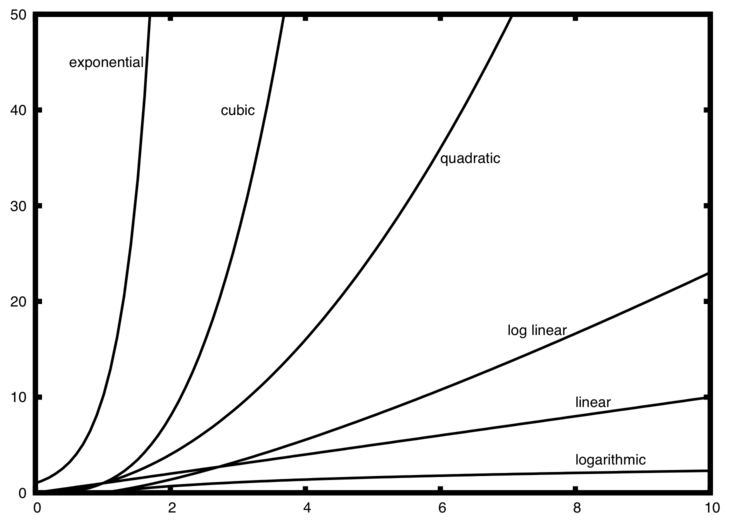

### __Another example__

```
a = 5
b = 6
c = 10
for i in range(n):
    for j in range(n):
        x = i * i
        y = j * j
        z = i * j
for k in range(n):
    w = a * k + 45
    v = b * b
d = 33
```

The number of assignment operations is the sum of four terms. The first term is the constant 3, representing the three assignment statements at the start of the fragment. The second term is 3n^2, since there are three statements that are performed n^2 times due to the nested iteration. The third term is 2n, two statements iterated n times. Finally, the fourth term is the constant 1, representing the final assignment statement. This gives us T(n)=3+3n^2+2n+1=3n^2+2n+4. By looking at the exponents, we can easily see that the n^2 term will be dominant and therefore this fragment of code is O(n^2). Note that all of the other terms as well as the coefficient on the dominant term can be ignored as n grows larger.

### Comparing T(n) with Common Big-O Functions

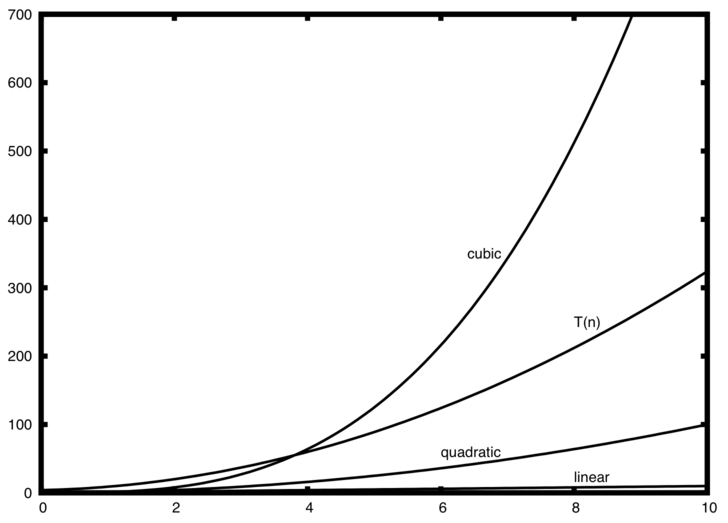

the figure above shows a few of the common Big-O functions as they compare with the T(n) function discussed above. Note that T(n) is initially larger than the cubic function. However, as n grows, the cubic function quickly overtakes T(n). It is easy to see that T(n) then follows the quadratic function as n continues to grow.

### Exercise

In [47]:
## O(n^2)

def MinNumber(Lista):
    a = Lista[0]
    for i in Lista:
        EsElMasPequeño = True
        for j in Lista:
            if i > j:
                EsElMasPequeño = False
        if EsElMasPequeño:
            a = i            
    return a

In [30]:
MinNumber([3,4,-10,5,6,7,-9])

-10

In [57]:
## O(n)

def minL(Lista):
    temp = Lista[0]
    for i in Lista:
        if i < temp:
            temp = i
    return temp

In [55]:
minL([3,4,-10,5,6,7,-9])

-10

In [48]:
import time
from random import randrange

for listSize in range(1000, 10001, 1000):
    a = [randrange(100000) for x in range(listSize)]
    start = time.time()
    print(MinNumber(a))
    end = time.time()
    print("Size: %d time: %f " %(listSize, end-start))

29
Size: 1000 time: 0.036950 
36
Size: 2000 time: 0.108364 
6
Size: 3000 time: 0.232625 
18
Size: 4000 time: 0.399074 
0
Size: 5000 time: 0.659685 
4
Size: 6000 time: 0.918694 
6
Size: 7000 time: 1.258576 
13
Size: 8000 time: 1.631059 
23
Size: 9000 time: 2.062801 
0
Size: 10000 time: 2.533400 


In [56]:
import time
from random import randrange

for listSize in range(1000, 10001, 1000):
    a = [randrange(100000) for x in range(listSize)]
    start = time.time()
    print(minL(a))
    end = time.time()
    print("Size: %d time: %f " %(listSize, end-start))

242
Size: 1000 time: 0.000292 
52
Size: 2000 time: 0.000140 
96
Size: 3000 time: 0.000193 
54
Size: 4000 time: 0.000241 
17
Size: 5000 time: 0.000259 
6
Size: 6000 time: 0.000399 
31
Size: 7000 time: 0.001745 
7
Size: 8000 time: 0.000329 
14
Size: 9000 time: 0.000368 
5
Size: 10000 time: 0.000407 


### Anagram Detection Example

#### Sol. 1

In [60]:
def anagram_solution_1(s1, s2):
    still_ok = True
    if len(s1) != len(s2):
        still_ok = False

    a_list = list(s2)
    pos_1 = 0

    while pos_1 < len(s1) and still_ok:
        pos_2 = 0
        found = False
        while pos_2 < len(a_list) and not found:
            if s1[pos_1] == a_list[pos_2]:
                found = True
            else:
                pos_2 = pos_2 + 1

        if found:
            a_list[pos_2] = None
        else:
            still_ok = False

        pos_1 = pos_1 + 1

    return still_ok


print(anagram_solution_1("apple", "pleap"))  # expected: True
print(anagram_solution_1("abcd", "dcba"))  # expected: True
print(anagram_solution_1("abcd", "dcda"))  # expected: False

True
True
False


To analyze this algorithm, we need to note that each of the n characters in `s1` will cause an iteration through up to ***n*** characters in the list from `s2.` Each of the n positions in the list will be visited once to match a character from `s1`. The number of visits then becomes the sum of the integers from 1 to n. We stated earlier that this can be written as

$\sum_{i=1}^{n}i=\frac{n(n+1)}{2}= \frac{1}{2}n^2+\frac{1}{2}n$

As ***n*** gets large, the $n^2$ term will dominate the n term and the $\frac{1}{2}$ can be ignored. Therefore, this solution is O($n^2$).

$\sum_{i=1}^{n}i=\frac{n(n+1)}{2}= \frac{1}{2}n^2+\frac{1}{2}n$


### Sol 2.

def anagram_solution_2(s1, s2):
    a_list_1 = list(s1)
    a_list_2 = list(s2)

    a_list_1.sort()
    a_list_2.sort()

    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if a_list_1[pos] == a_list_2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches


print(anagram_solution_2("apple", "pleap"))  # expected: True
print(anagram_solution_2("abcd", "dcba"))  # expected: True
print(anagram_solution_2("abcd", "dcda"))  # expected: False

At first glance you may be tempted to think that this algorithm is O(n), since there is one simple iteration to compare the n characters after the sorting process. However, the two calls to the Python sort method are not without their own cost. As we will see in a later chapter, sorting is typically either O($n^2$) or O($n log n$), so the sorting operations dominate the iteration. In the end, this algorithm will have the same order of magnitude as that of the sorting process.

### Sol 4.

In [3]:
def anagram_solution_4(s1, s2):
    c1 = [0] * 26
    c2 = [0] * 26

    for i in range(len(s1)):
        pos = ord(s1[i]) - ord("a")
        c1[pos] = c1[pos] + 1

    for i in range(len(s2)):
        pos = ord(s2[i]) - ord("a")
        c2[pos] = c2[pos] + 1

    j = 0
    still_ok = True
    while j < 26 and still_ok:
        if c1[j] == c2[j]:
            j = j + 1
        else:
            still_ok = False

    return still_ok


print(anagram_solution_4("apple", "pleap"))  # expected: True
print(anagram_solution_4("abcd", "dcba"))  # expected: True
print(anagram_solution_4("abcd", "dcda"))  # expected: False

True
True
False


Again, the solution has a number of iterations. However, unlike the first solution, none of them are nested. The first two iterations used to count the characters are both based on n. The third iteration, comparing the two lists of counts, always takes 26 steps since there are 26 possible characters in the strings. Adding it all up gives us T(n)=2n+26 steps. That is O(n). We have found a linear order of magnitude algorithm for solving this problem.

Before leaving this example, we need to say something about space requirements. Although the last solution was able to run in linear time, it could only do so by using additional storage to keep the two lists of character counts. In other words, this algorithm sacrificed space in order to gain time.

This is a common occurrence. On many occasions you will need to make decisions between time and space trade-offs. In this case, the amount of extra space is not significant. However, if the underlying alphabet had millions of characters, there would be more concern. As a computer scientist, when given a choice of algorithms, it will be up to you to determine the best use of computing resources given a particular problem.

### 3.6. Lists

The designers of Python had many choices to make when they implemented the list data structure. Each of these choices could have an impact on how fast list operations perform. To help them make the right choices they looked at the ways that people would most commonly use the list data structure and they optimized their implementation of a list so that the most common operations were very fast. Of course they also tried to make the less common operations fast, but when a trade-off had to be made the performance of a less common operation was often sacrificed in favor of the more common operation.

Two common operations are indexing and assigning to an index position. Both of these operations take the same amount of time no matter how large the list becomes. When an operation like this is independent of the size of the list they are O(1).

Another very common programming task is to grow a list. There are two ways to create a longer list. You can use the append method or the concatenation operator. The append method is O(1). However, the concatenation operator is O(k) where k is the size of the list that is being concatenated. This is important for you to know because it can help you make your own programs more efficient by choosing the right tool for the job.

Let’s look at four different ways we might generate a list of n numbers starting with 0. First we’ll try a for loop and create the list by concatenation, then we’ll use append rather than concatenation. Next, we’ll try creating the list using list comprehension and finally, and perhaps the most obvious way, using the range function wrapped by a call to the list constructor. Listing 3 shows the code for making our list four different ways.

In [56]:
def test1():
    l = []
    for i in range(1000):
        l = l + [i]


def test2():
    l = []
    for i in range(1000):
        l.append(i)


def test3():
    l = [i for i in range(1000)]


def test4():
    l = list(range(1000))

In [58]:
print(test1)

<function test1 at 0x7fd8806f5d30>


To capture the time it takes for each of our functions to execute we will use Python’s timeit module. The timeit module is designed to allow Python developers to make cross-platform timing measurements by running functions in a consistent environment and using timing mechanisms that are as similar as possible across operating systems.

To use timeit you create a Timer object whose parameters are two Python statements. The first parameter is a Python statement that you want to time; the second parameter is a statement that will run once to set up the test. The timeit module will then time how long it takes to execute the statement some number of times. By default timeit will try to run the statement one million times. When its done it returns the time as a floating point value representing the total number of seconds. However, since it executes the statement a million times you can read the result as the number of microseconds to execute the test one time. You can also pass timeit a named parameter called number that allows you to specify how many times the test statement is executed. The following session shows how long it takes to run each of our test functions 1000 times.

In [61]:
from timeit import Timer


t1 = Timer("test1()", "from __main__ import test1")
print(f"concatenation: {t1.timeit(number=10000):15.2f} milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print(f"appending: {t2.timeit(number=10000):19.2f} milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print(f"list comprehension: {t3.timeit(number=10000):10.2f} milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
print(f"list range: {t4.timeit(number=10000):18.2f} milliseconds")

concatenation:            8.34 milliseconds
appending:                0.47 milliseconds
list comprehension:       0.29 milliseconds
list range:               0.09 milliseconds


In the experiment above the statement that we are timing is the function call to test1(), test2(), and so on. The setup statement may look very strange to you, so let’s consider it in more detail. You are probably very familiar with the from, import statement, but this is usually used at the beginning of a Python program file. In this case the statement from __main__ import test1 imports the function test1 from the __main__ namespace into the namespace that timeit sets up for the timing experiment. The timeit module does this because it wants to run the timing tests in an environment that is uncluttered by any stray variables you may have created, that may interfere with your function’s performance in some unforeseen way.

From the experiment above it is clear that the append operation at 0.31 milliseconds is much faster than concatenation at 6.54 milliseconds. In the above experiment we also show the times for two additional methods for creating a list; using the list constructor with a call to range and a list comprehension. It is interesting to note that the list comprehension is twice as fast as a for loop with an append operation.

One final observation about this little experiment is that all of the times that you see above include some overhead for actually calling the test function, but we can assume that the function call overhead is identical in all four cases so we still get a meaningful comparison of the operations. So it would not be accurate to say that the concatenation operation takes 6.54 milliseconds but rather the concatenation test function takes 6.54 milliseconds. As an exercise you could test the time it takes to call an empty function and subtract that from the numbers above.

Now that we have seen how performance can be measured concretely you can look at Table 2 to see the Big-O efficiency of all the basic list operations. After thinking carefully about Table 2, you may be wondering about the two different times for pop. When pop is called on the end of the list it takes O(1) but when pop is called on the first element in the list or anywhere in the middle it is O(n). The reason for this lies in how Python chooses to implement lists. When an item is taken from the front of the list, in Python’s implementation, all the other elements in the list are shifted one position closer to the beginning. This may seem silly to you now, but if you look at Table 2 you will see that this implementation also allows the index operation to be O(1). This is a tradeoff that the Python implementors thought was a good one.

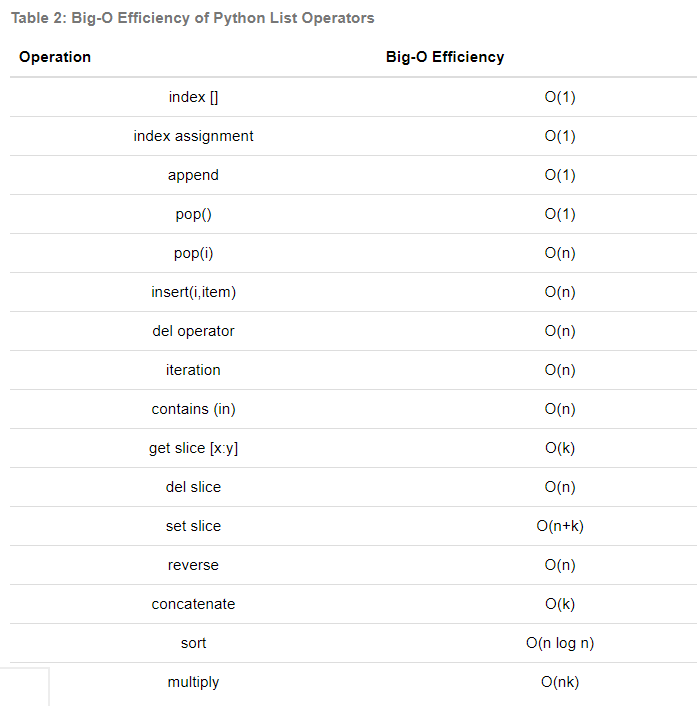

In [62]:
pop_zero = Timer("x.pop(0)", "from __main__ import x")
pop_end = Timer("x.pop()", "from __main__ import x")

x = list(range(2000000))
print(f"pop(0): {pop_zero.timeit(number=1000):10.5f} milliseconds")

x = list(range(2000000))
print(f"pop(): {pop_end.timeit(number=1000):11.5f} milliseconds")

pop(0):    1.17214 milliseconds
pop():     0.00005 milliseconds


In [88]:
pop_zero = Timer("x.pop(0)", "from __main__ import x")
pop_end = Timer("x.pop()", "from __main__ import x")
print(f"{'n':10s}{'pop(0)':>15s}{'pop()':>15s}")
for i in range(1_000_000, 3_000_001, 1_000_000):
    x = list(range(i))
    pop_zero_t = pop_zero.timeit(number=1000)
    x = list(range(i))
    pop_end_t = pop_end.timeit(number=1000)
    print(f"{i:<10d}{pop_zero_t:>15.5f}{pop_end_t:>15.5f}")

n                  pop(0)          pop()
1000000           0.23373        0.00003
2000000           0.93326        0.00005
3000000           1.67317        0.00005


Figure 3 shows the results of our experiment. You can see that as the list gets longer and longer the time it takes to pop(0) also increases while the time for pop stays very flat. This is exactly what we would expect to see for a O(n) and O(1) algorithm.

Some sources of error in our little experiment include the fact that there are other processes running on the computer as we measure that may slow down our code, so even though we try to minimize other things happening on the computer there is bound to be some variation in time. That is why the loop runs the test one thousand times in the first place to statistically gather enough information to make the measurement reliable.

### 3.7. Dictionaries

The second major Python data structure is the dictionary. As you probably recall, dictionaries differ from lists in that you can access items in a dictionary by a key rather than a position.

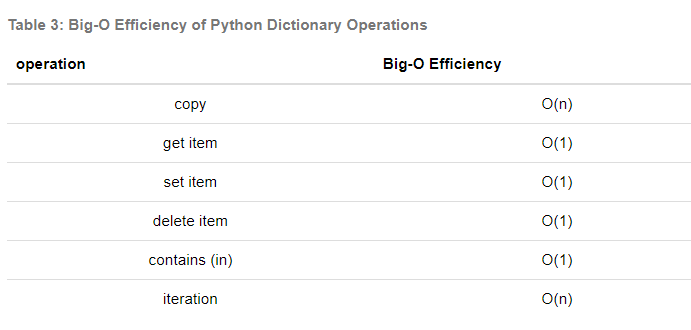

In [91]:
import timeit
import random

print(f"{'n':10s}{'list':>10s}{'dict':>10s}")
for i in range(10_000, 100_001, 20_000):
    t = timeit.Timer(f"random.randrange({i}) in x",
    "from __main__ import random, x")
    x = list(range(i))
    lst_time = t.timeit(number=1000)
    x = {j: None for j in range(i)}
    dict_time = t.timeit(number=1000)
    print(f"{i:<10,}{lst_time:>10.3f}{dict_time:>10.3f}")


n               list      dict
10,000         0.049     0.000
30,000         0.120     0.000
50,000         0.194     0.000
70,000         0.271     0.000
90,000         0.370     0.000


### 3.8. Summary

Algorithm analysis is an implementation-independent way of measuring an algorithm.

Big-O notation allows algorithms to be classified by their dominant process with respect to the size of the problem.